In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv("data/recruitment_data.csv")

# data initial insights

In [88]:
data.head(5)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [89]:
data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [90]:
data.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'EducationLevel'}>],
       [<Axes: title={'center': 'ExperienceYears'}>,
        <Axes: title={'center': 'PreviousCompanies'}>,
        <Axes: title={'center': 'DistanceFromCompany'}>],
       [<Axes: title={'center': 'InterviewScore'}>,
        <Axes: title={'center': 'SkillScore'}>,
        <Axes: title={'center': 'PersonalityScore'}>],
       [<Axes: title={'center': 'RecruitmentStrategy'}>,
        <Axes: title={'center': 'HiringDecision'}>, <Axes: >]],
      dtype=object)

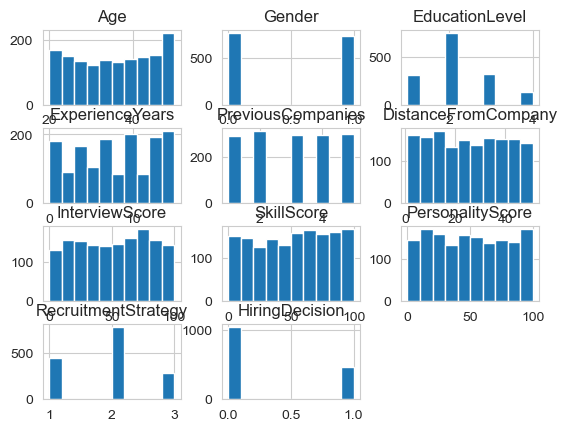

In [91]:
data.hist()

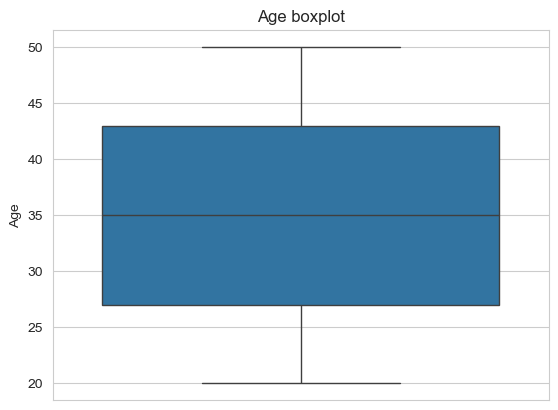

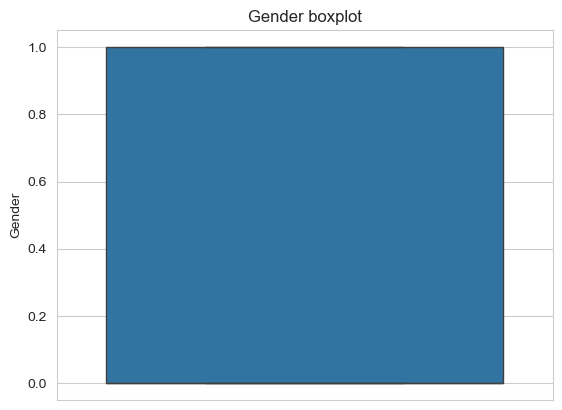

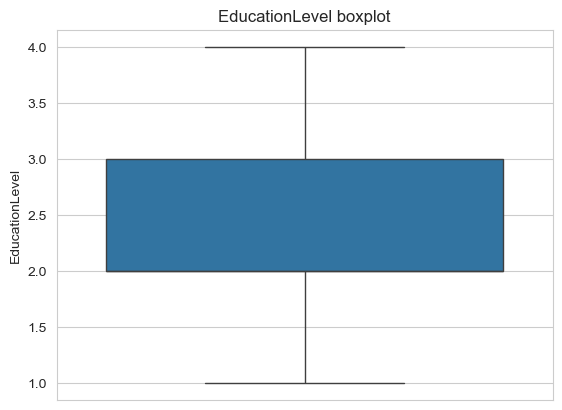

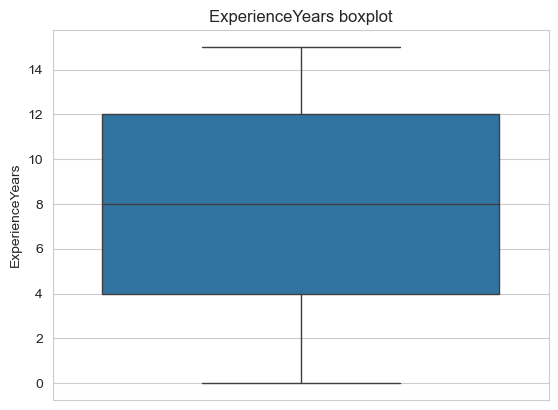

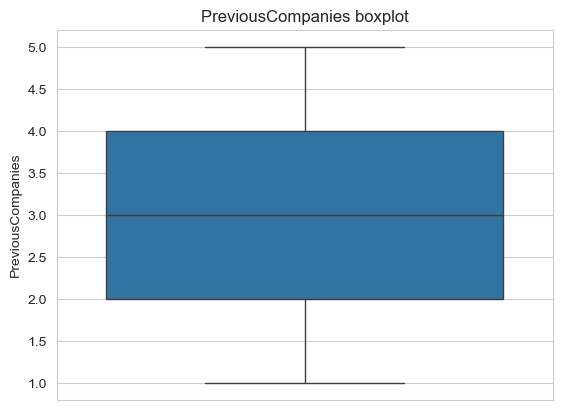

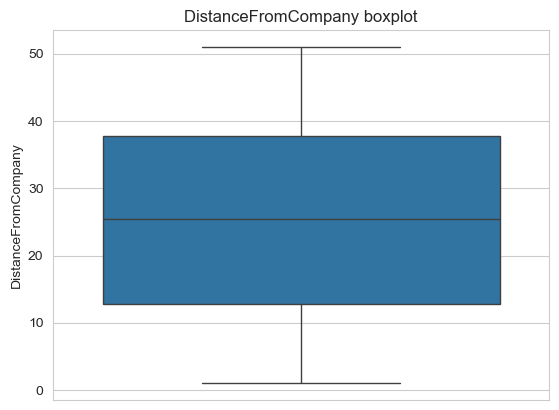

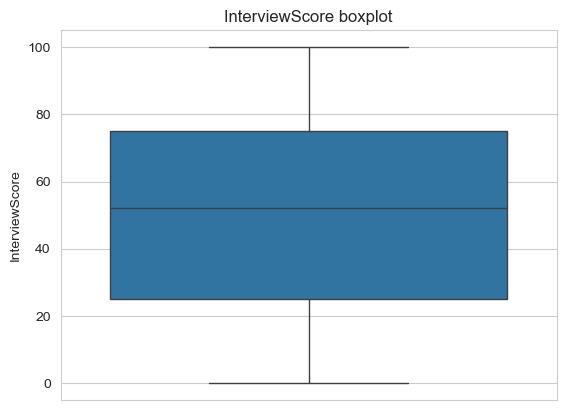

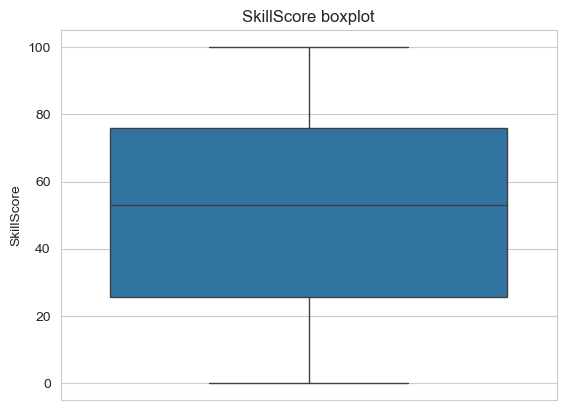

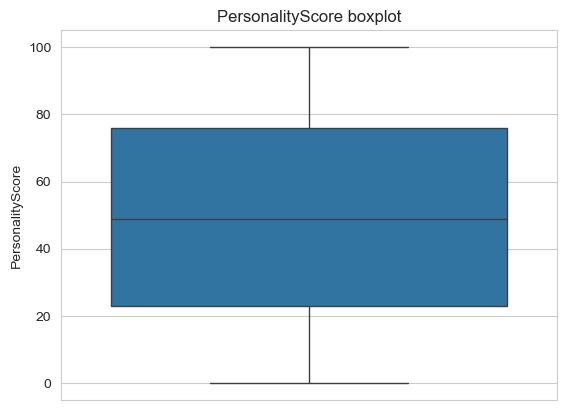

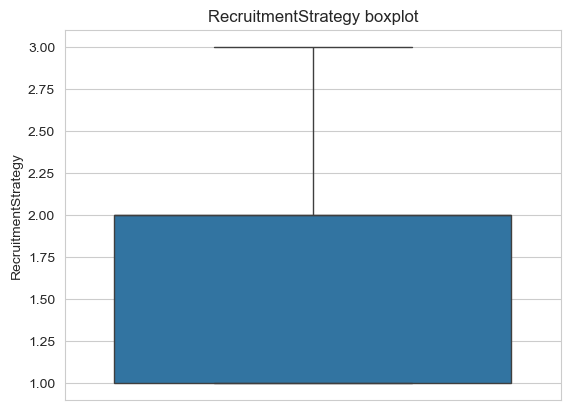

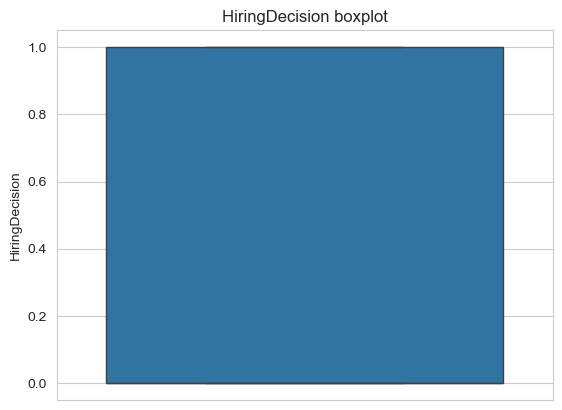

In [92]:
for c_name in data.columns:
    sns.boxplot(data[c_name])
    plt.title(c_name + " boxplot")
    plt.show()

## conclusions
Data is well prepared for analysis and modelling. There are any null values and any outliers. Also most of the features are well balanced.

# Data Analysis

In [93]:
for c_name in data.columns[:-1]:
    print(c_name, "ptp:",np.ptp(data[c_name]))

Age ptp: 30
Gender ptp: 1
EducationLevel ptp: 3
ExperienceYears ptp: 15
PreviousCompanies ptp: 4
DistanceFromCompany ptp: 49.9610863928972
InterviewScore ptp: 100
SkillScore ptp: 100
PersonalityScore ptp: 100
RecruitmentStrategy ptp: 2


<Axes: >

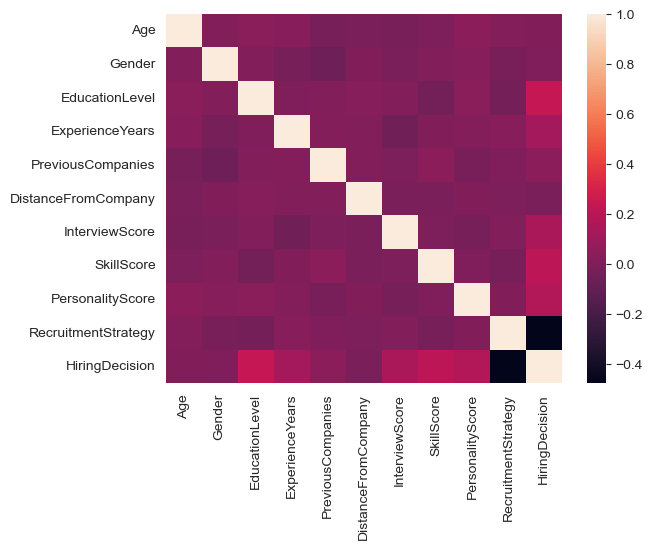

In [94]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

In [95]:
corr_with_target = corr_matrix["HiringDecision"].drop("HiringDecision")
print(corr_with_target)


Age                    0.001850
Gender                -0.002249
EducationLevel         0.236710
ExperienceYears        0.122494
PreviousCompanies      0.044025
DistanceFromCompany   -0.016791
InterviewScore         0.146064
SkillScore             0.203668
PersonalityScore       0.169177
RecruitmentStrategy   -0.477552
Name: HiringDecision, dtype: float64


In [96]:
i_max = corr_with_target.argmax()
i_min = corr_with_target.argmin()
print(corr_with_target.index[i_max])
print(corr_with_target.index[i_min])

EducationLevel
RecruitmentStrategy


It seems like Education is the most wanted feature by HR. Agressive recruitment seems to lower chances for potential candidates.

# Check importantness of features

In [97]:
from scipy.stats import pointbiserialr
for c_name in data.columns[:-1]:
    correlation, p_value = pointbiserialr(data['HiringDecision'], data[c_name])
    print(f'{c_name} P-value: {p_value:.3f}')

Age P-value: 0.943
Gender P-value: 0.931
EducationLevel P-value: 0.000
ExperienceYears P-value: 0.000
PreviousCompanies P-value: 0.088
DistanceFromCompany P-value: 0.516
InterviewScore P-value: 0.000
SkillScore P-value: 0.000
PersonalityScore P-value: 0.000
RecruitmentStrategy P-value: 0.000


low p-value means that features are positively correlated to the target and are somewhat important for predicting

In [98]:
X,y = data.drop(columns='HiringDecision'),data['HiringDecision']

In [99]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns   
mutual_info.sort_values(ascending=False)

RecruitmentStrategy    0.155131
EducationLevel         0.052977
InterviewScore         0.031654
ExperienceYears        0.025433
SkillScore             0.021203
PersonalityScore       0.019918
Gender                 0.005355
PreviousCompanies      0.000685
Age                    0.000000
DistanceFromCompany    0.000000
dtype: float64

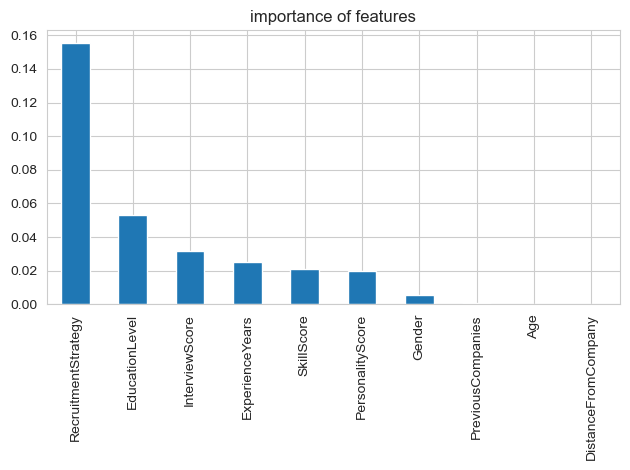

In [100]:
mutual_info.sort_values(ascending=False).plot.bar();
plt.title('importance of features')
plt.tight_layout()

# Modelling

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,make_scorer
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import copy

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.5)

In [103]:
def test_tuning(param_grid,estimator,X_train,y_train,X_valid,y_valid):
    model_untuned = copy.deepcopy(estimator)
    
    # prepare the grid
    scorer = make_scorer(f1_score, average='weighted')
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring=scorer)
    
    grid_search.fit(X_train,y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    
    # prediction
    y_pred1 = best_model.predict(X_valid)
    
    # without tuning
    model_untuned.fit(X_train,y_train)
    y_pred2 = model_untuned.predict(X_valid)
    
    # conclusions
    accuracy1 = accuracy_score(y_valid, y_pred1)
    accuracy2 = accuracy_score(y_valid, y_pred2)
    conf_matrix = confusion_matrix(y_valid, y_pred1)
    class_report = classification_report(y_valid, y_pred1)
    
    print(f"Tuned model accuracy: {accuracy1}")
    print(f"default settings model accuracy: {accuracy2}")
    print("Classification Report (tuned model):")
    print(class_report)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title('confusion matrix from best tuned model')
    plt.show()
    
    print(f'Model with tuning is better by:{accuracy1-accuracy2}')
    return best_model, y_pred1, y_pred2

## Logistic Regression

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Tuned model accuracy: 0.8666666666666667
default settings model accuracy: 0.8733333333333333
Classification Report (tuned model):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       102
           1       0.83      0.73      0.78        48

    accuracy                           0.87       150
   macro avg       0.86      0.83      0.84       150
weighted avg       0.86      0.87      0.86       150


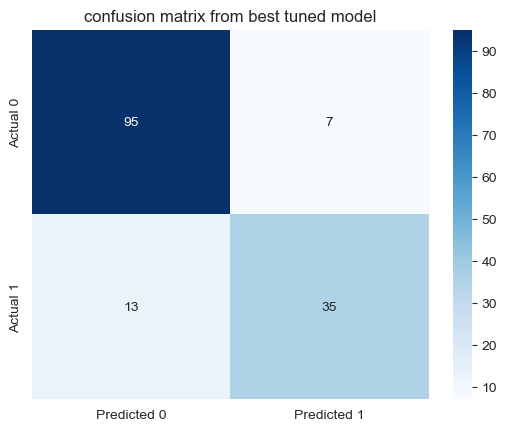

Model with tuning is better by:-0.006666666666666599


In [104]:
param_grid = {
    'C': [0.001, 0.01, 0.1,0.2,0.3,0.4,0.5, 1, 10,20,30],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=5000)

best_model_linreg, y_pred1, y_pred2 = test_tuning(param_grid,logreg,X_train,y_train,X_valid,y_valid)

## Decision Trees

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Tuned model accuracy: 0.8933333333333333
default settings model accuracy: 0.8733333333333333
Classification Report (tuned model):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       102
           1       0.85      0.81      0.83        48

    accuracy                           0.89       150
   macro avg       0.88      0.87      0.88       150
weighted avg       0.89      0.89      0.89       150


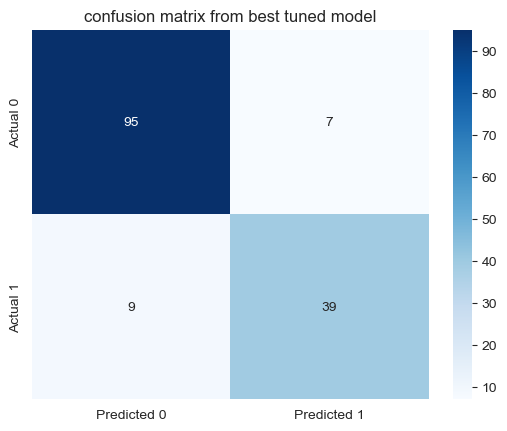

Model with tuning is better by:0.020000000000000018


In [105]:
param_grid = {
    'max_depth': [1,2,5,10,15,20,30,40,50,100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,5,10,15,20,30,40],
    'min_samples_leaf': [1,2,5,10,15,20,30,40]
}

DecTree = DecisionTreeClassifier()
best_model_dec_tree = test_tuning(param_grid,DecTree,X_train,y_train,X_valid,y_valid)

## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#     'n_estimators': [1,5,10,20,50,100,150],
#     'max_depth': [1,2,5,10,20,30,None],
#     'max_samples': [1,2,5,10,20,30,None],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [2,5,10,20],
#     'min_samples_leaf': [1,2,5,10,20],
#     'bootstrap':[True,False],
# }
# 
# rand_forest = RandomForestClassifier(n_jobs=-1)
# best_model_random_forest = test_tuning(param_grid,rand_forest,X_train,y_train,X_valid,y_valid)

## GradientBoosting

Best parameters: {'criterion': 'friedman_mse', 'min_samples_leaf': 5, 'n_estimators': 100, 'subsample': 0.8}
Tuned model accuracy: 0.9466666666666667
default settings model accuracy: 0.94
Classification Report (tuned model):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       102
           1       0.95      0.88      0.91        48

    accuracy                           0.95       150
   macro avg       0.95      0.93      0.94       150
weighted avg       0.95      0.95      0.95       150


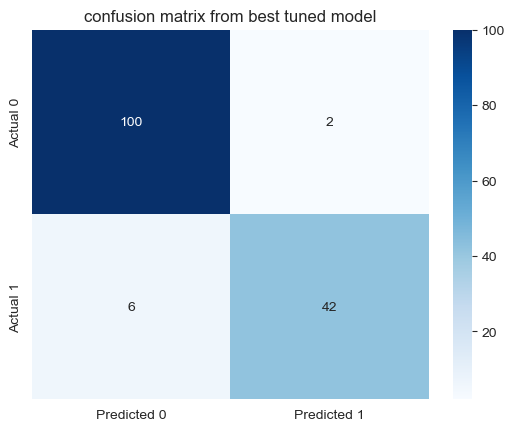

Model with tuning is better by:0.00666666666666671


In [107]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [50,100,150,200],
    'criterion': ['squared_error', 'friedman_mse'],
    'subsample':[0.1,0.3,0.5,0.8,1],
    'min_samples_leaf': [1,2,5]
}
GB = GradientBoostingClassifier()
best_model_GB = test_tuning(param_grid,GB,X_train,y_train,X_valid,y_valid)

# Best model
best model turned out to be RandomForest with tuning

In [108]:
# from previous runs
best_parameters = {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_samples': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

In [109]:
model = RandomForestClassifier(bootstrap=False, criterion='entropy', min_samples_leaf=2,min_samples_split=2, n_estimators=150)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', min_samples_leaf=2,
                       n_estimators=150)

In [110]:
model.score(X_test,y_test)

0.9466666666666667

Final model accuracy: 0.9466666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       106
           1       0.91      0.91      0.91        44

    accuracy                           0.95       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150


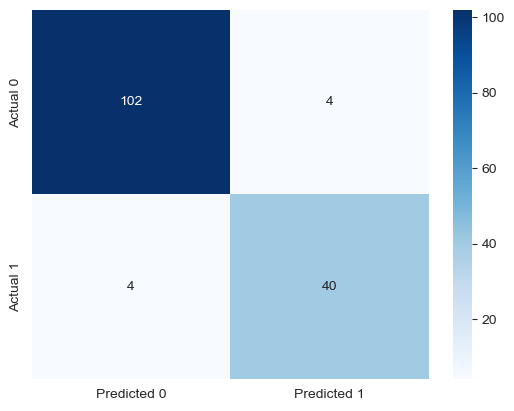

In [112]:
y_pred = model.predict(X_test)
# conclusions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Final model accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.show()

# Conclusion
model succesfully with 90+% accuracy is predicting whether person will be hired or not